# Functional Neural Network
In this example, we will use a simple neural network to output two different values. The first one will be the number of cylinders the car has and the second one will be its miles per gallon. Although cylinders is an integer, we will turn it into a category just to showcase how the network can predict both a continous and a categorical value.

In [85]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [86]:
# Read data from csv and covert into pandas dataframe
df = pd.read_csv('auto-mpg.csv') 

In [152]:
# Take a random sample to get a sneak-peak of the data and its values
np.random.seed(1)
df.sample(n=10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Brand
174,18.0,6,171.0,97,2984,14.5,75,1,ford
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot
250,19.4,8,318.0,140,3735,13.2,78,1,dodge
274,20.3,5,131.0,103,2830,15.9,78,2,audi
283,20.2,6,232.0,90,3265,18.2,79,1,amc
232,16.0,8,351.0,149,4335,14.5,77,1,ford
117,29.0,4,68.0,49,1867,19.5,73,2,fiat
348,37.7,4,89.0,62,2050,17.3,81,3,toyota
189,15.5,8,304.0,120,3962,13.9,76,1,amc
106,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile


In [88]:
# Some preliminary information about the data set and its distribution
print('Types of variables in dataframe:')
print(df.info())
print('\nShape of dataframe:')
print(df.shape)
print('\n5 Point analysis of numerical variables in dataframe:')
print(df.describe().T)
print('\nNumber of null values in dataframe:')
print(df.isnull().sum())

Types of variables in dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

Shape of dataframe:
(398, 9)

5 Point analysis of numerical variables in dataframe:
              count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  3

In [89]:
# Convert object variables into categorical variables

for i in df.columns[df.dtypes == 'object']:
    df[i]= df[i].astype('category')

df['cylinders'] = df['cylinders'].astype('category')

In [90]:
# You may notice column 'Horsepower' as an object, the reason behind this is we have 6 values as '?'. So we will use a KNN
# imputer to get rid of that and then turn them into integers.
imputer = KNNImputer(n_neighbors=5)
df['horsepower'].replace('?', np.nan, inplace=True)
df[['horsepower']] = imputer.fit_transform(df[['horsepower']])
df['horsepower'] = df['horsepower'].astype('int')

In [91]:
# Let us extract the brand of car from the full name. Notice how the car name starts with the brand
def get_Brand(value):
    return(value.split()[0])

df['Brand'] = df['car name'].apply(get_Brand).astype('category')
df.drop(columns = 'car name', inplace = True)

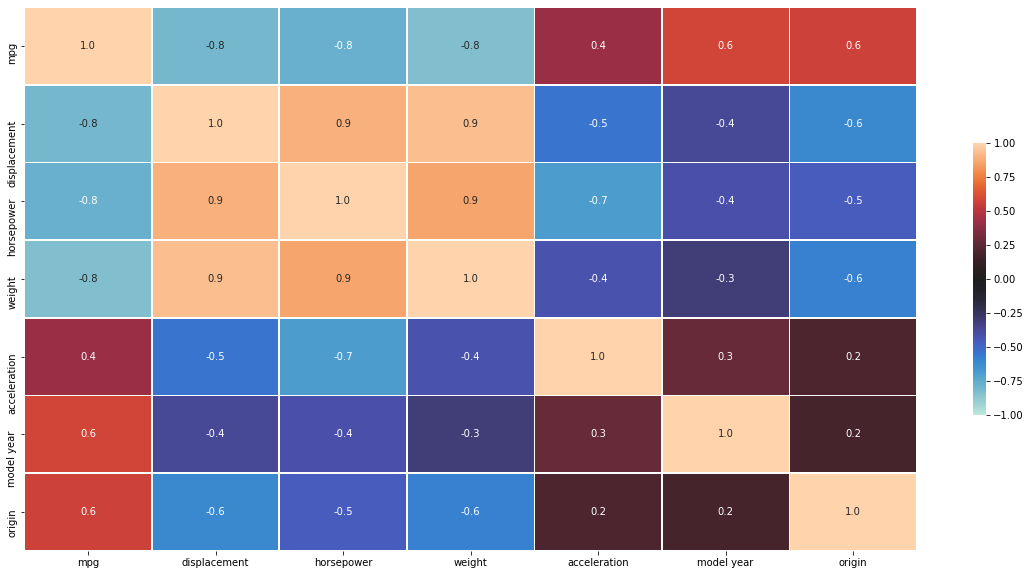

In [92]:
# Let us better visualize the relationship between variables with a heatmap
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr()

f, ax = plt.subplots(figsize=(20, 10)) #Set heatmap size

sns.heatmap(corr, annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0, square=False, linewidths=.7, cbar_kws={"shrink": .5});

In [96]:
# Standarize data and divide into features and response variable 
X = df.drop(columns = ['cylinders', 'mpg'])
y_main = df[['mpg', 'cylinders']]
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

for i in ['displacement', 'horsepower', 'weight', 'acceleration','model year', 'origin']:
    X[i] = z_transform(X[i])
X = pd.get_dummies(X)

In [97]:
# We require a testing set and both a training and validation set for our neural network, so let us divide the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y_main, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1)

In [98]:
# We also need to divide the response dataframe into two, and then get dummies for the categorical section of the network
y_test_main = y_test[['mpg']]
y_test_aux = y_test[['cylinders']]
y_train_main = y_train[['mpg']]
y_train_aux = y_train[['cylinders']]
y_val_main = y_val[['mpg']]
y_val_aux = y_val[['cylinders']]

y_test_aux = pd.get_dummies(y_test_aux)
y_train_aux = pd.get_dummies(y_train_aux)
y_val_aux = pd.get_dummies(y_val_aux)

In [102]:
# Just to check all varibales are numerical
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 373 to 171
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   displacement         254 non-null    float64
 1   horsepower           254 non-null    float64
 2   weight               254 non-null    float64
 3   acceleration         254 non-null    float64
 4   model year           254 non-null    float64
 5   origin               254 non-null    float64
 6   Brand_amc            254 non-null    uint8  
 7   Brand_audi           254 non-null    uint8  
 8   Brand_bmw            254 non-null    uint8  
 9   Brand_buick          254 non-null    uint8  
 10  Brand_cadillac       254 non-null    uint8  
 11  Brand_capri          254 non-null    uint8  
 12  Brand_chevroelt      254 non-null    uint8  
 13  Brand_chevrolet      254 non-null    uint8  
 14  Brand_chevy          254 non-null    uint8  
 15  Brand_chrysler       254 non-null    u

In [150]:
# We create a very simple model with three hidden layers
input_ = keras.layers.Input(shape=X.shape[1:]) # We need to pass the number of columns in X
hidden1 = keras.layers.Dense(100, activation="relu")(input_) # First hidden layer with 100 nodes
hidden2 = keras.layers.Dense(200, activation="relu")(hidden1) # 200 nodes for our second layer
hidden3 = keras.layers.Dense(300, activation="relu")(hidden2) # 300 nodes for the final  layer, all using relu activation
aux_output = keras.layers.Dense(5, activation="softmax", name="aux_output")(hidden3) # Aux output, categorical so it needs
# a softmax activation function
output = keras.layers.Dense(1, name="main_output")(hidden3) # Main output, does not require activation function since it is
# a regression node
model = keras.Model(inputs=[input_], outputs=[output, aux_output]) # combine all of our layer
model.compile(loss=["mse", "categorical_crossentropy"], loss_weights=[0.6, 0.4], optimizer="sgd", 
              metrics = ['mse', 'accuracy']) # Provide the loss functions to our model, the weights of the erros for each 
# output layer and the optimizer to use. We also want mse for regression performance and accuracy for the classification one

In [151]:
history = model.fit(
[X_train], [y_train_main, y_train_aux], epochs=50,
validation_data=([X_val], [y_val_main, y_val_aux])) # let us train our model

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 250.9836 - main_output_loss: 417.3022 - aux_output_loss: 1.5057 - main_output_mse: 417.3022 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.1507 - aux_output_accuracy: 0.4449 - val_loss: 169.8255 - val_main_output_loss: 282.0436 - val_aux_output_loss: 1.4982 - val_main_output_mse: 282.0436 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.1506 - val_aux_output_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 167.6314 - main_output_loss: 278.4583 - aux_output_loss: 1.3910 - main_output_mse: 278.4583 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.1394 - aux_output_accuracy: 0.5197 - val_loss: 69.5027 - val_main_output_loss: 114.9175 - val_aux_output_loss: 1.3805 - val_main_output_mse: 114.9175 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.1376 - val_aux_output_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 4ms/ste

Epoch 19/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6583 - main_output_loss: 5.5190 - aux_output_loss: 0.8673 - main_output_mse: 5.5190 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.0889 - aux_output_accuracy: 0.6142 - val_loss: 5.0048 - val_main_output_loss: 7.7446 - val_aux_output_loss: 0.8953 - val_main_output_mse: 7.7446 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.0938 - val_aux_output_accuracy: 0.5625
Epoch 20/50
8/8 [==============================] - 0s 3ms/step - loss: 5.3597 - main_output_loss: 8.3639 - aux_output_loss: 0.8533 - main_output_mse: 8.3639 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.0875 - aux_output_accuracy: 0.6220 - val_loss: 5.6952 - val_main_output_loss: 8.9058 - val_aux_output_loss: 0.8795 - val_main_output_mse: 8.9058 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.0921 - val_aux_output_accuracy: 0.5625
Epoch 21/50
8/8 [==============================] - 0s 3ms/step - loss: 5.2782 - ma

Epoch 37/50
8/8 [==============================] - 0s 3ms/step - loss: 2.4269 - main_output_loss: 3.5687 - aux_output_loss: 0.7143 - main_output_mse: 3.5687 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.0720 - aux_output_accuracy: 0.7323 - val_loss: 5.1493 - val_main_output_loss: 8.0693 - val_aux_output_loss: 0.7691 - val_main_output_mse: 8.0693 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.0809 - val_aux_output_accuracy: 0.6875
Epoch 38/50
8/8 [==============================] - 0s 3ms/step - loss: 2.6372 - main_output_loss: 3.9207 - aux_output_loss: 0.7120 - main_output_mse: 3.9207 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.0717 - aux_output_accuracy: 0.7323 - val_loss: 5.6692 - val_main_output_loss: 8.9331 - val_aux_output_loss: 0.7734 - val_main_output_mse: 8.9331 - val_main_output_accuracy: 0.0000e+00 - val_aux_output_mse: 0.0808 - val_aux_output_accuracy: 0.6875
Epoch 39/50
8/8 [==============================] - 0s 3ms/step - loss: 3.1790 - ma

In [125]:
y_pred_main, y_pred_aux = model.predict([X_test])

In [153]:
model.evaluate(
[X_test], [y_test_main, y_test_aux])

3/3 [==============================] - 0s 8ms/step - loss: 4.4522 - main_output_loss: 6.9628 - aux_output_loss: 0.6863 - main_output_mse: 6.9628 - main_output_accuracy: 0.0000e+00 - aux_output_mse: 0.0652 - aux_output_accuracy: 0.8125


[4.4521803855896,
 6.9627814292907715,
 0.6862789392471313,
 6.9627814292907715,
 0.0,
 0.06522232294082642,
 0.8125]

# Results
Our very simple and quick to train model achieves a mean squared error value of 6.96 when predicting miles per gallon and an accuracy of 81.25 per cent when predicting the make of the car. These results could certainly be improved, and the first step for this would be to use cross validation and pipelines to perform data manipulation without risk of information leakage. We will leave this exercise to the reader.